### Dataset Link : https://www.kaggle.com/wenruliu/adult-income-dataset

#### B22
#### 93-Mohit Punjabi
#### 94-Rohit Punjabi
#### 95- Suraj Wadhwa

### Importing Libraries

In [1]:
library(ggplot2)#visualization
library(Amelia)#missing map
library(dplyr)#EDA
library(caTools)#Logisitc
library(caret)#confusion matrix

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'Amelia' was built under R version 3.6.3"Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'caTools' was built under R version 3.6.3"Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice


### Importing Dataset

In [2]:
# importing dataset in adult variable
adult<-read.csv('adult.csv')

### EDA

In [3]:
# shows first six records in the table
head(adult)

age,workclass,fnlwgt,education,educational.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
# shows last six records  in the table
tail(adult)

,age,workclass,fnlwgt,education,educational.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
48837,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48838,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48839,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48840,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48841,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48842,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
# shows the first six record arrange in order of age
head(adult[order(adult$age),])

,age,workclass,fnlwgt,education,educational.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
39,17,Private,269430,10th,6,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
76,17,?,165361,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
403,17,Private,40299,11th,7,Never-married,Sales,Own-child,White,Female,0,0,25,United-States,<=50K
676,17,Private,190941,10th,6,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
766,17,?,143331,11th,7,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
904,17,Private,61838,11th,7,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K


In [6]:
# shows the last six record arrange in order of age
tail(adult[order(adult$age),])

,age,workclass,fnlwgt,education,educational.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
41585,90,?,175444,7th-8th,4,Separated,?,Not-in-family,White,Female,0,0,15,United-States,<=50K
44745,90,Federal-gov,195433,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,30,United-States,<=50K
47312,90,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
47978,90,?,313986,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,>50K
48559,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
48649,90,Local-gov,214594,7th-8th,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K


In [7]:
# calculating mean and median of educational num.
mean(adult$educational.num)
median1<-median(adult$educational.num)
median1

[1] 10.07809

[1] 10

In [8]:
# filtered the data where educational num is less than 
# median of eduactional num
filter(adult,adult$educational.num<median1) 

age,workclass,fnlwgt,education,educational.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
26,Private,82091,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,39,United-States,<=50K
58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K
43,Private,128354,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,30,United-States,<=50K


In [9]:
# filtered the data where gender is Male
filter(adult,adult$gender=="Male")

age,workclass,fnlwgt,education,educational.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [10]:
# filtered the data where gender is male and 
# relationship is husband
filter(adult,gender=="Male",relationship=="Husband")

age,workclass,fnlwgt,education,educational.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K
43,Private,346189,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K


In [11]:
# internal structure of dataset
str(adult)

'data.frame':	48842 obs. of  15 variables:
 $ age            : int  25 38 28 44 18 34 29 63 24 55 ...
 $ workclass      : Factor w/ 9 levels "?","Federal-gov",..: 5 5 3 5 1 5 1 7 5 5 ...
 $ fnlwgt         : int  226802 89814 336951 160323 103497 198693 227026 104626 369667 104996 ...
 $ education      : Factor w/ 16 levels "10th","11th",..: 2 12 8 16 16 1 12 15 16 6 ...
 $ educational.num: int  7 9 12 10 10 6 9 15 10 4 ...
 $ marital.status : Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 3 3 5 5 5 3 5 3 ...
 $ occupation     : Factor w/ 15 levels "?","Adm-clerical",..: 8 6 12 8 1 9 1 11 9 4 ...
 $ relationship   : Factor w/ 6 levels "Husband","Not-in-family",..: 4 1 1 1 4 2 5 1 5 1 ...
 $ race           : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 3 5 5 3 5 5 3 5 5 5 ...
 $ gender         : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 2 2 2 1 2 ...
 $ capital.gain   : int  0 0 0 7688 0 0 0 3103 0 0 ...
 $ capital.loss   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week : i

In [12]:
# summary of dataset
summary(adult)

      age                   workclass         fnlwgt       
 Min.   :17.00   Private         :33906   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 3862   1st Qu.: 117551  
 Median :37.00   Local-gov       : 3136   Median : 178145  
 Mean   :38.64   ?               : 2799   Mean   : 189664  
 3rd Qu.:48.00   State-gov       : 1981   3rd Qu.: 237642  
 Max.   :90.00   Self-emp-inc    : 1695   Max.   :1490400  
                 (Other)         : 1463                    
        education     educational.num               marital.status 
 HS-grad     :15784   Min.   : 1.00   Divorced             : 6633  
 Some-college:10878   1st Qu.: 9.00   Married-AF-spouse    :   37  
 Bachelors   : 8025   Median :10.00   Married-civ-spouse   :22379  
 Masters     : 2657   Mean   :10.08   Married-spouse-absent:  628  
 Assoc-voc   : 2061   3rd Qu.:12.00   Never-married        :16117  
 11th        : 1812   Max.   :16.00   Separated            : 1530  
 (Other)     : 7625                   Widowe

In [13]:
adult[adult == "?"] <- NA # replacing the '?' with NA
colSums(is.na(adult)) # calculating the total count of the NA(null) values

age       workclass          fnlwgt       education educational.num 
              0            2799               0               0               0 
 marital.status      occupation    relationship            race          gender 
              0            2809               0               0               0 
   capital.gain    capital.loss  hours.per.week  native.country          income 
              0               0               0             857               0

In [14]:
# dimension for the adult dataset before removing null values
dim(adult) 

[1] 48842    15

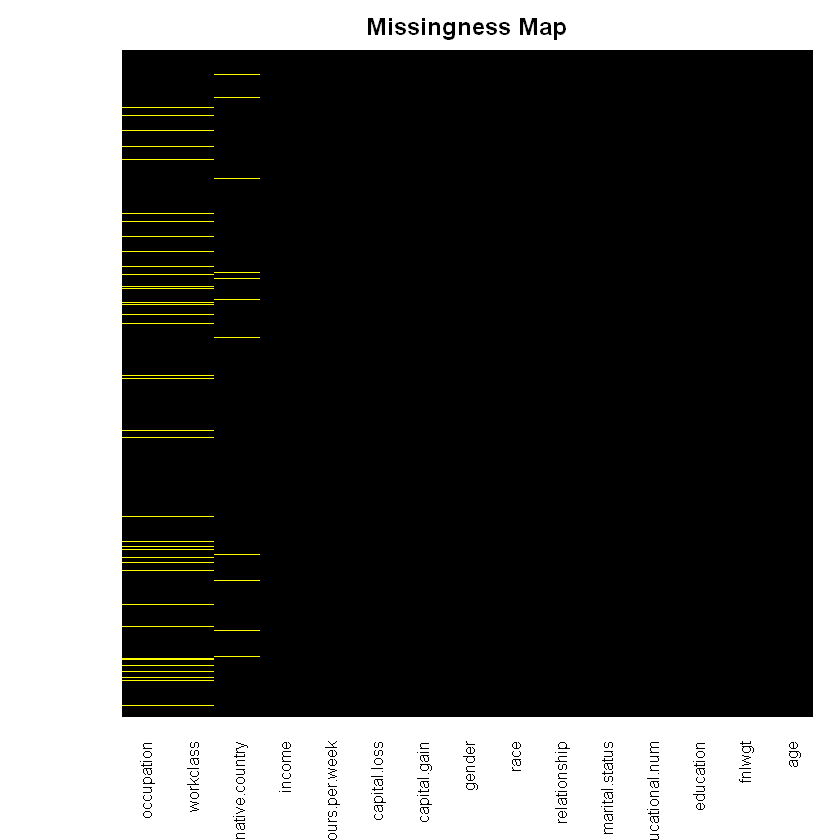

In [15]:
missmap(adult, y.at = 1, y.labels = "", col = c("yellow", "black"), legend = FALSE)
# missing values are found at occupation,workclass,native.country

In [16]:
# removing null values
adult <- na.omit(adult)

In [17]:
# dimension after removing the null values
dim(adult)
# removed 3620 null values

[1] 45222    15

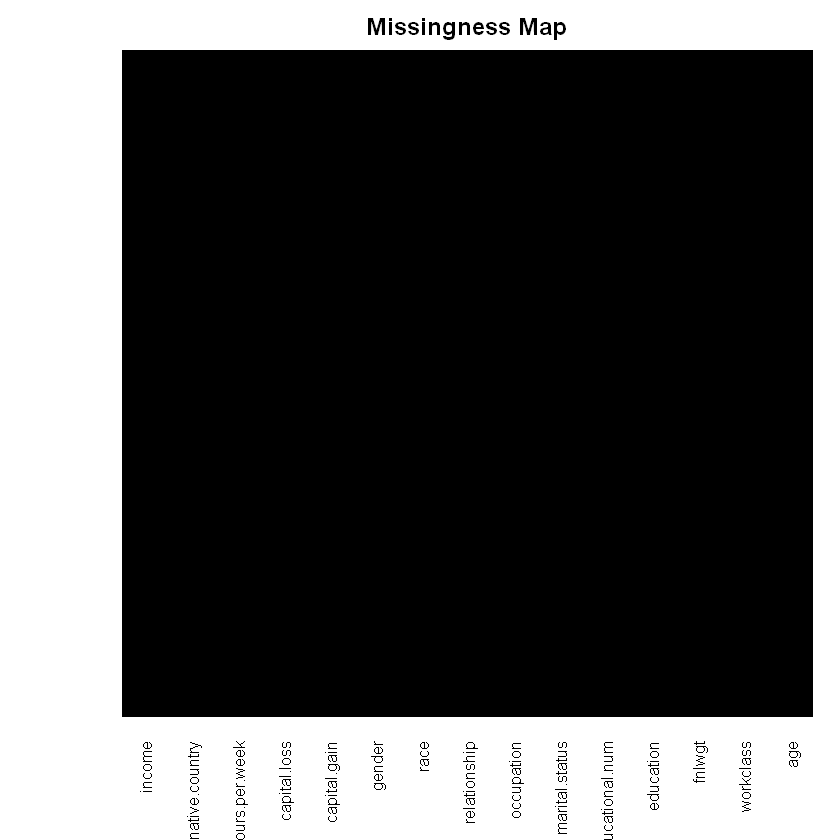

In [18]:
missmap(adult, y.at = 1, y.labels = "", col = c("yellow", "black"), legend = FALSE)
# No missing values found.

#  
#   
#   

### Visualization

### PLOT1

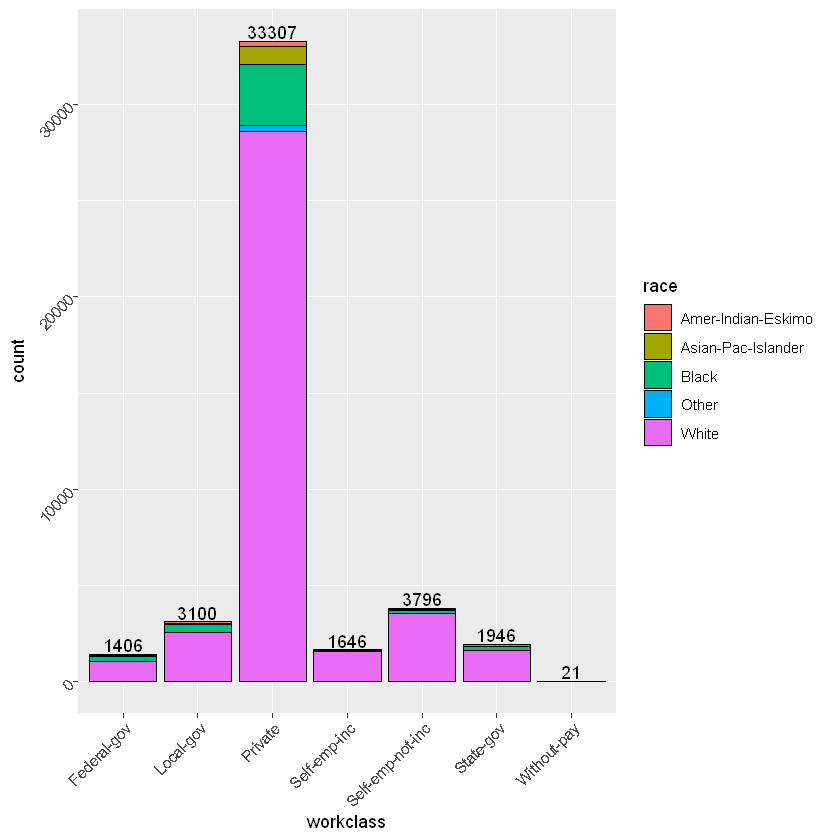

In [19]:
# The Bar plot shows the no of people and their race in a specific workclass
adult %>% ggplot(aes(workclass)) + 
  geom_bar(aes(fill = race), colour = 'black')+
  geom_text(aes(label=..count..),stat='count',vjust=-0.2)+
theme(axis.text=element_text(angle = 45,hjust = 1))

#  
#  

### PLOT2 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


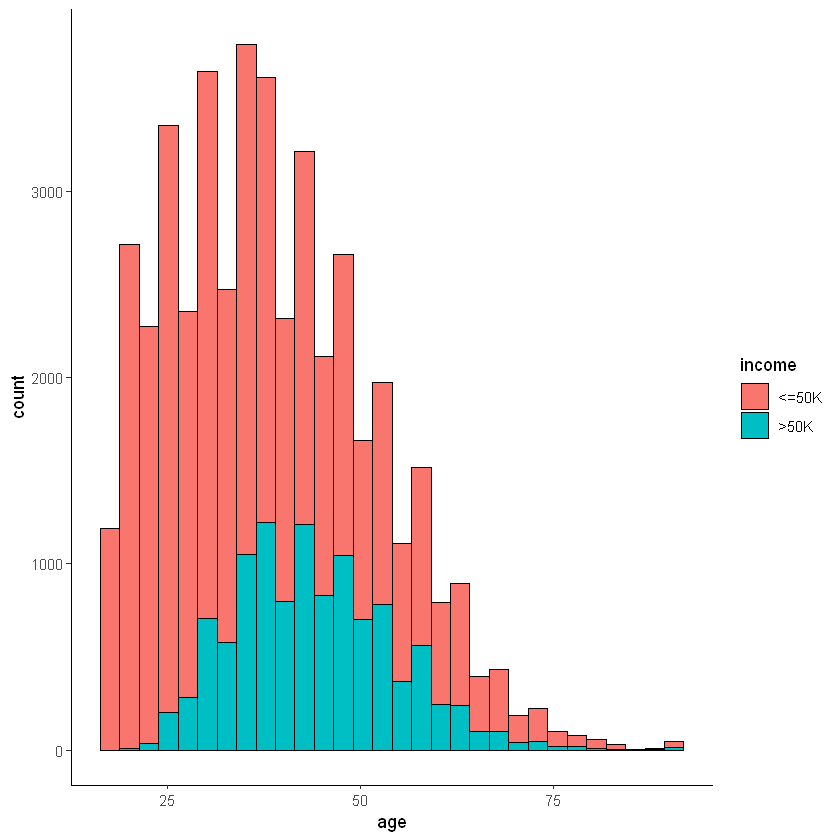

In [20]:
# The Histogram plot shows that only half or less than half 
# number of people earn >50K in each age group 
ggplot(adult,aes(age)) + 
  geom_histogram(aes(fill = income), colour = 'black')+theme_classic()

### PLOT3

Loading required package: RColorBrewer


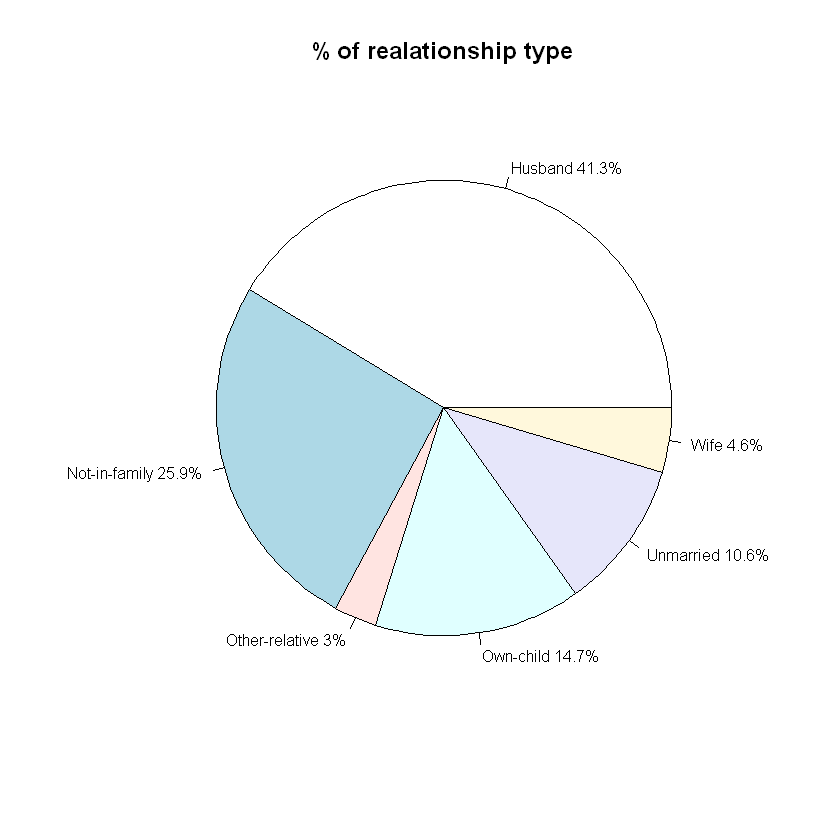

In [21]:
# Pie plot shows the % of relationsip types in the dataset
require("RColorBrewer")
M <- table(adult$relationship)
percent<- round(100*M/sum(M), 1)
pie(percent, labels = paste0(row.names(M)," ",percent,"%") ,
    main = '% of realationship type', cex = 0.8)


### PLOT4

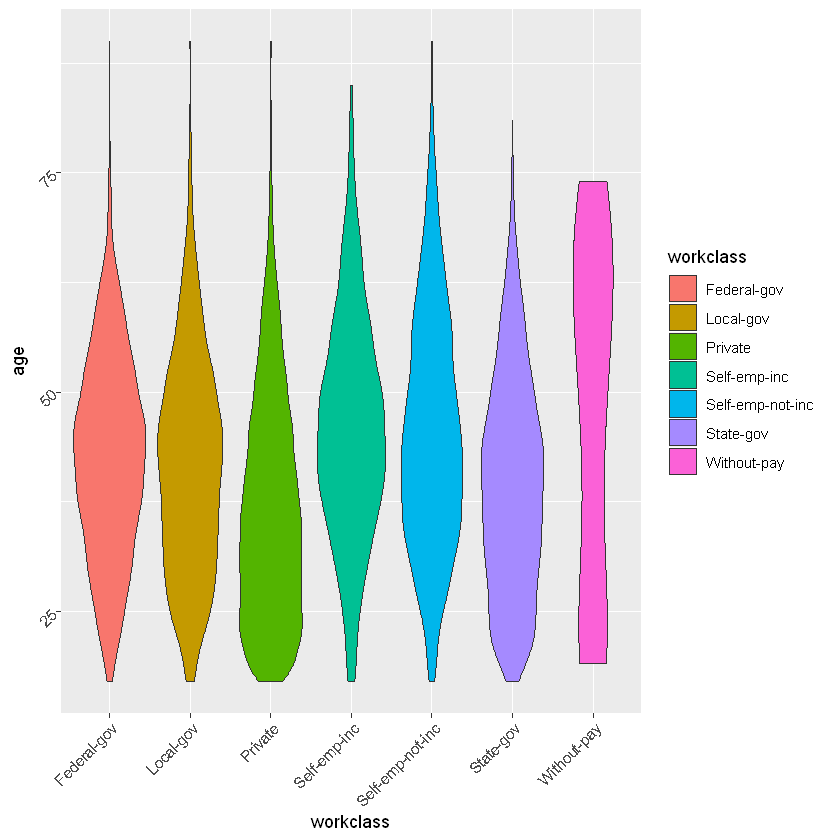

In [22]:
# The violin plot shows the people working in each workclass 
# according to the age. in this number of older people in 
# without pay are more than younger people
adult %>% ggplot(aes(workclass,age))+geom_violin(aes(fill=workclass))+
    theme(axis.text=element_text(angle = 45,hjust = 1))

### PLOT 5

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


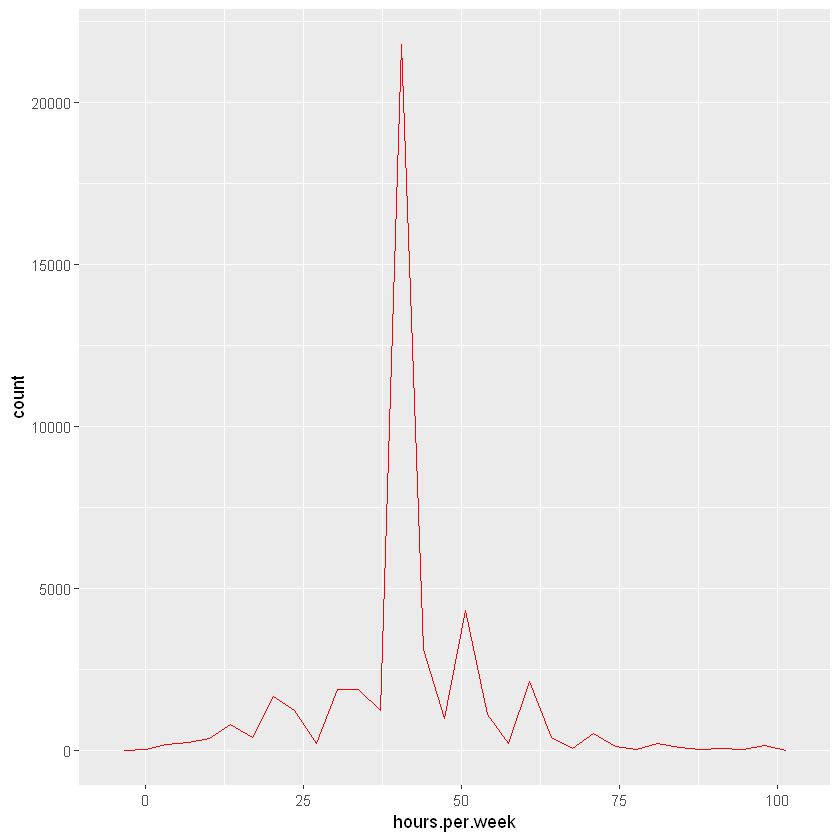

In [23]:
# Frequency plot shows that atleast 20000 
# people work between 30 to 40 hours per week.
adult%>%ggplot(aes(hours.per.week))+geom_freqpoly(col = 'red')

### PLOT 6

[1] Never-married         Married-civ-spouse    Widowed              
[4] Separated             Divorced              Married-spouse-absent
[7] Married-AF-spouse    
7 Levels: Divorced Married-AF-spouse ... Widowed

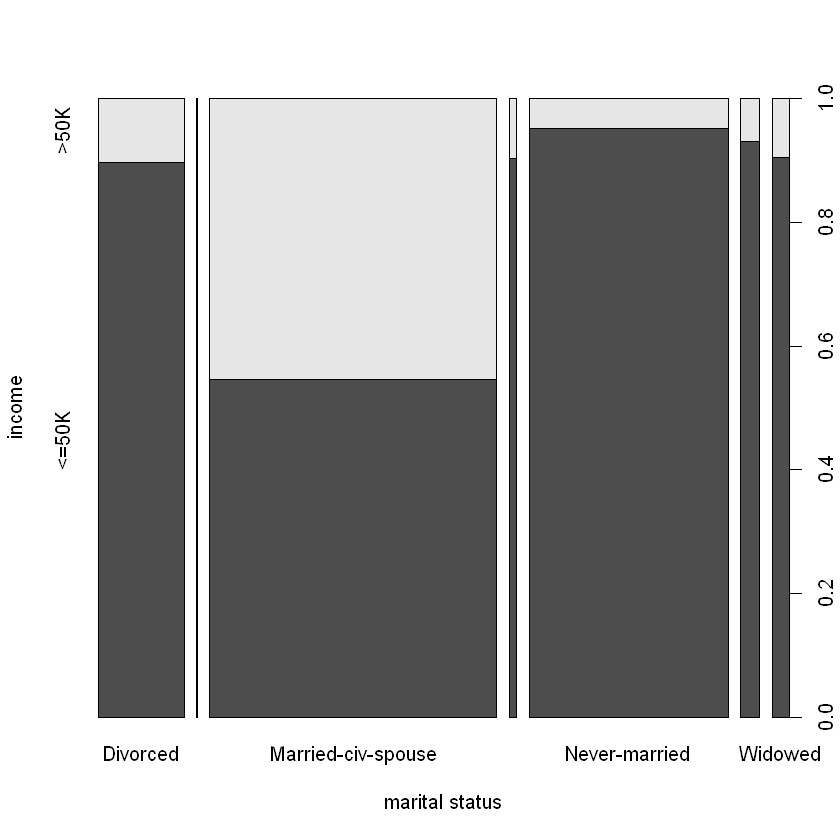

In [24]:
# Spineplot is the comparison between marital status and income. 
# Married-civ people columns shows the highest 
# number of values and only column with more >50K value
spineplot(as.factor(adult$marital.status),as.factor(adult$income)
          ,xlab="marital status",ylab = "income")
unique(adult$marital.status)


### Logistic Regression Model

In [25]:
# Splitting the data in train and test with 70 and 30 ratio
set.seed(10)
split <- sample.split(adult$income, SplitRatio = 0.7)
train <- subset(adult, split == TRUE)
test <- subset(adult, split == FALSE)

In [26]:
# dimension of training data
dim(train)

[1] 31656    15

In [27]:
# fitting the model for training data using glm function
log.model <- glm(income ~ ., family = binomial, train)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [28]:
# summary for trained model
summary(log.model)


Call:
glm(formula = income ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.9033  -0.5104  -0.1923  -0.0174   3.4058  

Coefficients: (1 not defined because of singularities)
                                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                              -7.532e+00  7.810e-01  -9.645  < 2e-16
age                                       2.487e-02  1.672e-03  14.878  < 2e-16
workclassLocal-gov                       -5.317e-01  1.103e-01  -4.821 1.43e-06
workclassPrivate                         -4.092e-01  9.199e-02  -4.448 8.65e-06
workclassSelf-emp-inc                    -3.162e-01  1.202e-01  -2.631 0.008506
workclassSelf-emp-not-inc                -9.680e-01  1.080e-01  -8.966  < 2e-16
workclassState-gov                       -8.304e-01  1.226e-01  -6.774 1.25e-11
workclassWithout-pay                     -1.021e+00  8.122e-01  -1.257 0.208625
fnlwgt                                    8.

In [29]:
# predicting the the model using test data and type as response
prediction <- predict(log.model,test, type = "response")
head(prediction)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

3          26          34          35          39          42 
0.404259131 0.915089939 0.329975710 0.027939639 0.005750016 0.484758609

In [30]:
# dimension for test data and confusion matrix of the model
dim(test)
acc<-table(test$income, prediction >= 0.5)
acc

[1] 13566    15

       
        FALSE TRUE
  <=50K  9474  730
  >50K   1296 2066

In [31]:
# accuracy of the model
# accuracy is 85%
(acc[1]+acc[4])/(acc[1]+acc[2]+acc[3]+acc[4])

[1] 0.8506561

In [32]:
# converting to the classes in the prediction outcome and
# head of the predictions and income of test data after converting 
p_class<-ifelse(prediction>0.5,">50K","<=50K")
head(p_class)
head(test$income)

3      26      34      35      39      42 
"<=50K"  ">50K" "<=50K" "<=50K" "<=50K" "<=50K"

[1] >50K  >50K  <=50K <=50K <=50K >50K 
Levels: <=50K >50K

In [33]:
# calculating accuracy of model using ConfusionMatrixFunction
# which comes same as 85%
confusionMatrix(as.factor(p_class), test$income)

Confusion Matrix and Statistics

          Reference
Prediction <=50K >50K
     <=50K  9474 1296
     >50K    730 2066
                                          
               Accuracy : 0.8507          
                 95% CI : (0.8445, 0.8566)
    No Information Rate : 0.7522          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5755          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9285          
            Specificity : 0.6145          
         Pos Pred Value : 0.8797          
         Neg Pred Value : 0.7389          
             Prevalence : 0.7522          
         Detection Rate : 0.6984          
   Detection Prevalence : 0.7939          
      Balanced Accuracy : 0.7715          
                                          
       'Positive' Class : <=50K           
                     